# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
#!pip install torchsummary
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import pandas as pd
import random
import matplotlib.pyplot as plt
import torch
from ddpg_agent import Agent
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
!pwd
#env = UnityEnvironment(file_name='unity_env/Reacher_Linux_NoVis/Reacher.x86_64',no_graphics=True)
env = UnityEnvironment(file_name='unity_env/Reacher_Linux_NoVis/Reacher.x86_64')

/home/ubuntu/deep-reinforcement-learning/p2_continuous-control


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

`
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
`


When finished, you can close the environment.

In [5]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```


In [5]:
env_info = env.reset(train_mode=True)[brain_name]
# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)
# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)
# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
num_agents=states.shape[0]
print('Number of agent:', num_agents)
print('size of states for each agent:', state_size)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:{}".format(device))

Number of agents: 1
Size of each action: 4
Number of agent: 1
size of states for each agent: 33
device:cuda:0


In this section I will use [DDPG](https://arxiv.org/pdf/1509.02971.pdf) algorithm to train the actor/critic network. We have utilized Replay buffer to save experiences from all agents used samped.In this lab, I have used Single Agent and updated the network every time step after collectting a experiences from Single Agent each(20 experiences).

First I tried the hyper parameter setting and Batch Normalization recommended in paper. I have changed some configuration and tested following combinations. 

- 0) Single Agent + Default Initialization + No Batch normalization on both Actor/Critic+Hidden Layer(400,300)
- 1) Single Agent + Default Initialization + No Batch normalization on both Actor/Critic+Hidden Layer(256,128)
- 2) Single Agent + Default Initialization+ Default Batch norm. on both Actor/Critic+Hidden Layer(256,128)
- 3) Single Agent + Xavier uniform initialization + No Batch normalization on both Actor/Critic+Hidden Layer(256,128)
- 4) Single Agent + Xavier uniform initialization + Default Batch normalization on both Actor/Critic+Hidden Layer(256,128)
- 5) Single Agent + Xavier uniform initialization + Batch normalization on first state input on both Actor/Critic+Hidden Layer(256,128)
- 6) Single Agent + Xavier uniform initialization + Batch normalization on first state input on both Actor/Critic +Hidden Lyaer (400,300)
- 7) Single Agent + Default Initialization+ Default Batch norm. on both Actor/Critic+Hidden Layer (400,300)



Default configuration means recommended setting shown in the [DDPG](https://arxiv.org/pdf/1509.02971.pdf) paper at "Supplementary Information: Continuous control withdeep reinforcement learning".

In [6]:
 
def train_agent(model_num,n_episodes=250, max_t=1000, print_every=50):
    scores_deque = deque(maxlen=100)
    episode_scores = []                                     #average scores of agents per episode
    episode_mean_scores=[]                                  #average scores of agents for last 100 episode 
    last_mean_max=0   
    env_solved=False
    episode_goal_achieved=-1
    for i_episode in range(1, n_episodes+1):      
        env_info = env.reset(train_mode=True)[brain_name]                 # reset the environment    
        states = env_info.vector_observations   
        agent.reset()
        scores = np.zeros(num_agents)        
        for t in range(max_t):
            actions =agent.act(states)
          
            env_info = env.step(actions)[brain_name]                        # send all actions to tne environment
            next_states = env_info.vector_observations                      # get next state (for each agent)
            rewards = env_info.rewards
            dones = env_info.local_done  
                                         
            agent.step(t,states, actions, rewards, next_states, dones)
            states = next_states
            scores += rewards
            
            if np.any(dones):
                break 
        score=np.mean(scores)
        scores_deque.append(score)
        episode_scores.append(score)
        
        episode_mean_scores.append(np.mean(scores_deque)) 
        
        print('\rEpisode {} \tScore: {:.2f} \t Avg. Score: {:.2f}'.format(i_episode,score, np.mean(scores_deque)), end="")
        
        if np.mean(scores_deque)>=30.0:
            if env_solved==False:
                print('\nEnvironment solved in {:d} episodes!'.format(i_episode-100, np.mean(scores_deque)))
                env_solved=True
                episode_goal_achieved=i_episode
                
            if(np.mean(scores_deque)>last_mean_max):
                actor_model_name='checkpoint_actor_'+str(model_num)+'siingle'+'.pth'
                critic_model_name='checkpoint_critic_'+str(model_num)+'single'+'.pth'
                torch.save(agent.actor_local.state_dict(), actor_model_name)
                torch.save(agent.critic_local.state_dict(), critic_model_name)
                last_mean_max=np.mean(scores_deque)
        if i_episode % print_every == 0:
           print('\rEpisode {} \tScore: {:.2f} \t Avg. Score: {:.2f}'.format(i_episode,score, np.mean(scores_deque)))
            
    return episode_scores, episode_mean_scores, episode_goal_achieved


condition=[]
score_history=[]
mean_score_history=[]
first_episode_achieved=[]

Actor Network: Actor(
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=4, bias=True)
)
Critic Network: Critic(
  (fcs1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=404, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
)
Episode 50 	Score: 0.88 	 Avg. Score: 1.46
Episode 100 	Score: 2.01 	 Avg. Score: 1.92
Episode 150 	Score: 1.69 	 Avg. Score: 1.92
Episode 200 	Score: 1.01 	 Avg. Score: 1.31
Episode 250 	Score: 2.06 	 Avg. Score: 1.14


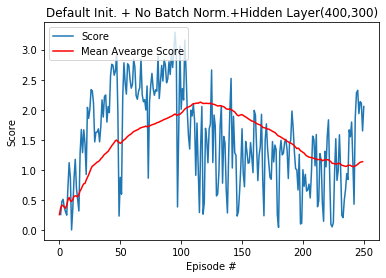

In [8]:
#####################################################
# Single Agent 
# Default Init.
# No Batch norm. on both Actor/Critic
# Hidden Layer(400,300)
#####################################################
agent=Agent(num_agents=num_agents, state_size=state_size, 
            action_size=action_size, random_seed=2,
            actor_bn1=False, actor_bn2=False,
            critic_bn1=False, critic_bn2=False,
            custom_init=False,
            fc1_units=400,fc2_units=300)
scores, mean_scores,episode_goal_achieved = train_agent(model_num=0)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Default Init. + No Batch Norm.+Hidden Layer(400,300)')
plt.plot(np.arange(1, len(scores)+1), scores,label='Score' )
plt.ylabel('Score')
plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

condition.append('Default Init.+No Batch Norm.+Hidden Layer(400,300)')
score_history.append(max(scores))
mean_score_history.append(max(mean_scores))
first_episode_achieved.append(episode_goal_achieved)


Actor Network: Actor(
  (fc1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)
Critic Network: Critic(
  (fcs1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=260, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)
Episode 50 	Score: 2.89 	 Avg. Score: 2.44
Episode 100 	Score: 6.53 	 Avg. Score: 3.53
Episode 150 	Score: 5.10 	 Avg. Score: 5.54
Episode 200 	Score: 7.09 	 Avg. Score: 6.34
Episode 250 	Score: 2.77 	 Avg. Score: 5.16


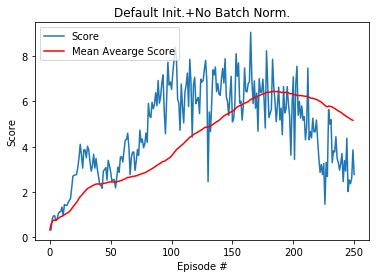

In [9]:
#####################################################
# Single Agent 
# Default Init.
# No Batch norm. on both Actor/Critic
#####################################################
agent=Agent(num_agents=num_agents, state_size=state_size, 
            action_size=action_size, random_seed=2,
            actor_bn1=False, actor_bn2=False,
            critic_bn1=False, critic_bn2=False,
            custom_init=False)
scores, mean_scores,episode_goal_achieved = train_agent(model_num=1)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Default Init.+No Batch Norm.')
plt.plot(np.arange(1, len(scores)+1), scores,label='Score' )
plt.ylabel('Score')
plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

condition.append('Default Init.+No Batch Norm.')
score_history.append(max(scores))
mean_score_history.append(max(mean_scores))
first_episode_achieved.append(episode_goal_achieved)


Actor Network: Actor(
  (fc1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
  (bn1): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Critic Network: Critic(
  (fcs1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=260, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
  (bn1): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Episode 50 	Score: 36.86 	 Avg. Score: 12.12
Episode 100 	Score: 35.82 	 Avg. Score: 24.05
Episode 119 	Score: 36.05 	 Avg. Score: 30.2

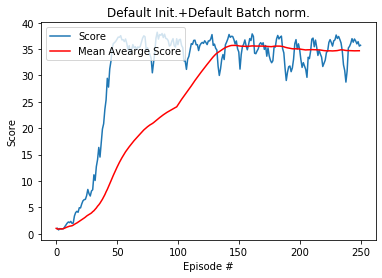

In [10]:
#####################################################################
# Single Agent 
# Default Init.
# Default Batch norm. on both Actor/Critic
# (Actor: norm/.on state inputs+all layers of actor network) 
# (Critic: all layers of Critic prior to action input)
#####################################################################

agent=Agent(num_agents=num_agents, state_size=state_size, 
            action_size=action_size, random_seed=2,
            actor_bn1=True,actor_bn2=True,
            critic_bn1=True, critic_bn2=True,
            custom_init=False)
scores, mean_scores,episode_goal_achieved = train_agent(model_num=2)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Default Init.+Default Batch norm.')
plt.plot(np.arange(1, len(scores)+1), scores,label='Score' )
plt.ylabel('Score')
plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

condition.append('Default Init.+Default Batch norm.')
score_history.append(max(scores))
mean_score_history.append(max(mean_scores))
first_episode_achieved.append(episode_goal_achieved)



Actor Network: Actor(
  (fc1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)
Critic Network: Critic(
  (fcs1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=260, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)
Episode 50 	Score: 4.66 	 Avg. Score: 1.05
Episode 100 	Score: 15.37 	 Avg. Score: 6.02
Episode 150 	Score: 17.87 	 Avg. Score: 13.38
Episode 200 	Score: 18.97 	 Avg. Score: 16.99
Episode 250 	Score: 29.48 	 Avg. Score: 21.51


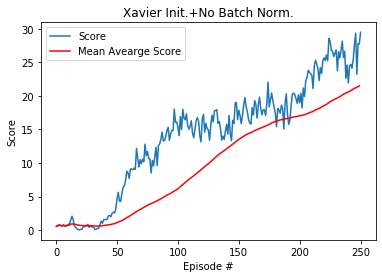

In [11]:
#########################################################
# Single Agent 
# Xavier Init.
# No Batch norm. on both Actor/Critic
#########################################################
agent=Agent(num_agents=num_agents, state_size=state_size, 
            action_size=action_size, random_seed=2,
            actor_bn1=False,actor_bn2=False,
            critic_bn1=False, critic_bn2=False,
            custom_init=True)
scores, mean_scores,episode_goal_achieved = train_agent(model_num=3)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Xavier Init.+No Batch Norm.')
plt.plot(np.arange(1, len(scores)+1), scores,label='Score' )
plt.ylabel('Score')
plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

condition.append('Xavier Init.+No Batch Norm.')
score_history.append(max(scores))
mean_score_history.append(max(mean_scores))
first_episode_achieved.append(episode_goal_achieved)


Actor Network: Actor(
  (fc1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
  (bn1): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Critic Network: Critic(
  (fcs1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=260, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
  (bn1): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Episode 50 	Score: 1.92 	 Avg. Score: 0.69
Episode 100 	Score: 28.44 	 Avg. Score: 6.69
Episode 150 	Score: 35.88 	 Avg. Score: 22.17
E

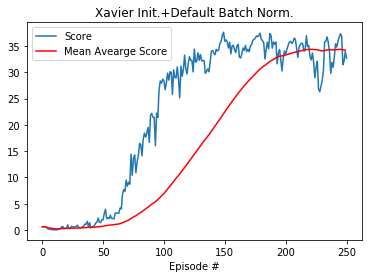

In [12]:
#########################################################
# Single Agent 
# Xavier Init.
# Default Batch norm. on both Actor/Critic
#########################################################
agent=Agent(num_agents=num_agents, state_size=state_size, 
            action_size=action_size, random_seed=2,
            actor_bn1=True,actor_bn2=True,
            critic_bn1=True, critic_bn2=True,
            custom_init=True)
scores, mean_scores,episode_goal_achieved = train_agent(model_num=4)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Xavier Init.+Default Batch Norm.')
plt.plot(np.arange(1, len(scores)+1), scores,label='Score')
plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

condition.append('Xavier Init.+Default Batch Norm.')
score_history.append(max(scores))
mean_score_history.append(max(mean_scores))
first_episode_achieved.append(episode_goal_achieved)


In [ ]:
#########################################################
# Single Agent 
# Xavier Init.
# Batch norm. on first state input on both Actor/Critic
#########################################################
agent=Agent(num_agents=num_agents, state_size=state_size, 
            action_size=action_size, random_seed=2,
            actor_bn1=True,actor_bn2=True,
            critic_bn1=False, critic_bn2=False,
            custom_init=True)
scores, mean_scores,episode_goal_achieved = train_agent(model_num=5)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Xavier Init.+Batch norm. on first state inputs on both Actor/Critic')
plt.plot(np.arange(1, len(scores)+1), scores,label='Score')
plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

condition.append('Xavier Init.+Batch norm. on first state inputs on both Actor/Critic')
score_history.append(max(scores))
mean_score_history.append(max(mean_scores))
first_episode_achieved.append(episode_goal_achieved)

Actor Network: Actor(
  (fc1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
  (bn1): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Critic Network: Critic(
  (fcs1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=260, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)
Episode 50 	Score: 2.83 	 Avg. Score: 1.18
Episode 100 	Score: 1.64 	 Avg. Score: 1.21
Episode 150 	Score: 1.92 	 Avg. Score: 1.42
Episode 200 	Score: 0.43 	 Avg. Score: 1.55
Episode 229 	Score: 0.78 	 Avg. Score: 1.52

Actor Network: Actor(
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=4, bias=True)
  (bn1): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Critic Network: Critic(
  (fcs1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=404, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
)
Episode 50 	Score: 2.81 	 Avg. Score: 0.87
Episode 100 	Score: 0.83 	 Avg. Score: 1.09
Episode 150 	Score: 1.29 	 Avg. Score: 1.14
Episode 200 	Score: 0.22 	 Avg. Score: 1.01
Episode 250 	Score: 1.37 	 Avg. Score: 0.96


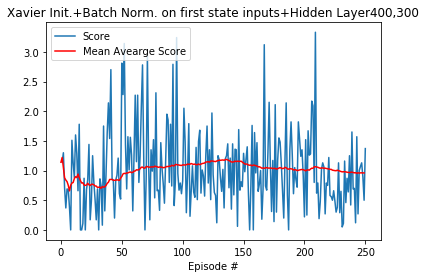

In [7]:
#########################################################
# Single Agent
# Xavier Init.
# Batch norm. on first state input on both Actor/Critic
# Hidden Layer of 400,300 nodes
#########################################################
agent=Agent(num_agents=num_agents, state_size=state_size, 
            action_size=action_size, random_seed=2,
            actor_bn1=True,actor_bn2=True,
            critic_bn1=False, critic_bn2=False,
            custom_init=True,fc1_units=400,fc2_units=300)
scores, mean_scores,episode_goal_achieved = train_agent(model_num=6)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Xavier Init.+Batch Norm. on first state inputs+Hidden Layer400,300')
plt.plot(np.arange(1, len(scores)+1), scores,label='Score')
plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

condition.append('Xavier Init.+Batch Nrrm. on first state inputs+Hidden Layer400,300')
score_history.append(max(scores))
mean_score_history.append(max(mean_scores))
first_episode_achieved.append(episode_goal_achieved)

Actor Network: Actor(
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=4, bias=True)
  (bn1): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Critic Network: Critic(
  (fcs1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=404, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
  (bn1): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Episode 50 	Score: 2.72 	 Avg. Score: 1.22
Episode 100 	Score: 1.36 	 Avg. Score: 1.28
Episode 150 	Score: 1.40 	 Avg. Score: 1.32
Epis

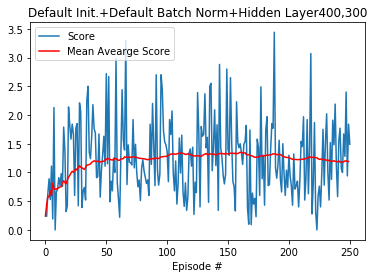

In [10]:
#########################################################
# Single Agent 
# Xavier Init.
# Batch norm. on first state input on both Actor/Critic
# Hidden Layer of 400,300 nodes
#########################################################
agent=Agent(num_agents=num_agents, state_size=state_size, 
            action_size=action_size, random_seed=2,
            actor_bn1=True,actor_bn2=True,
            critic_bn1=True, critic_bn2=True,
            custom_init=False,fc1_units=400,fc2_units=300)
scores, mean_scores,episode_goal_achieved = train_agent(model_num=7)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Default Init.+Default Batch Norm+Hidden Layer400,300')
plt.plot(np.arange(1, len(scores)+1), scores,label='Score')
plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

condition.append('Default Init.+Default Batch Norm+Hidden Layer400,300')
score_history.append(max(scores))
mean_score_history.append(max(mean_scores))
first_episode_achieved.append(episode_goal_achieved)

In [9]:
dc = pd.DataFrame(data=[condition])
dc=dc.T
print(dc)
df = pd.DataFrame(data=[score_history, mean_score_history, first_episode_achieved])
df=df.T

df.columns = [ 'MaxScore','MaxMeanScore','F_Episode']
print(df)

                                                   0
0  Default Init.+Default Batch Norm+Hidden Layer4...
    MaxScore  MaxMeanScore  F_Episode
0  38.989499     37.050864      118.0
